In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,ElasticNet,ElasticNetCV,Ridge,RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
scaler=StandardScaler()
linear=LinearRegression()
lasso=Lasso()
lasscv=LassoCV()
elastic=ElasticNet()
elasticv=ElasticNetCV()
rid=Ridge()
ridcv=RidgeCV()

In [3]:
df=pd.read_csv('data_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [5]:
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [9]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,0


In [10]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [13]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,-0.254938
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,0.401141
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,0.185077
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,0.058411
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,-0.265322
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,-0.223282
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,0.051413
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,-0.307232
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,-0.125529
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,-0.201010


<Axes: >

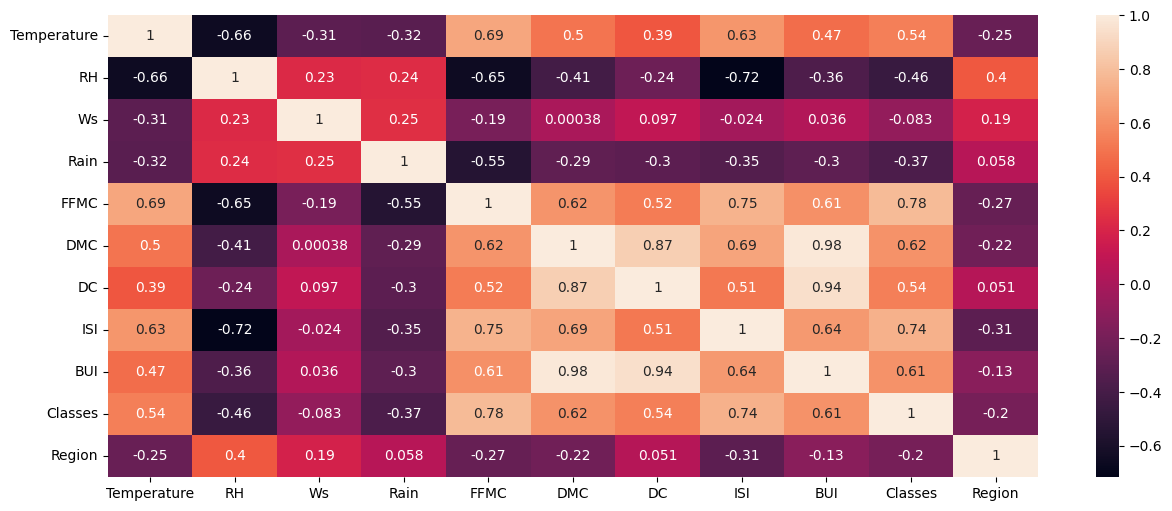

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(x_train.corr(),annot=True)

In [15]:
def drop_column(dataset,frequency):
    col_name=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>frequency:
                colname=corr_matrix.columns[i]
                col_name.add(colname)
    return col_name


In [16]:
dop_col=drop_column(x_train,0.85)
dop_col

{'BUI', 'DC'}

In [17]:
x_train.drop(dop_col,axis=1,inplace=True)
x_test.drop(dop_col,axis=1,inplace=True)

In [18]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,1
141,31,72,14,0.2,60.2,3.8,0.8,0,0
192,40,31,15,0.0,94.2,22.5,16.6,1,0
68,32,60,18,0.3,77.1,11.3,2.2,0,1
119,32,47,14,0.7,77.5,7.1,1.8,0,1
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,1
14,28,80,17,3.1,49.4,3.0,0.4,0,1
92,25,76,17,7.2,46.0,1.3,0.2,0,1
179,34,59,16,0.0,88.1,19.5,7.4,1,0


In [19]:
x_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,1
6,33,54,13,0.0,88.2,9.9,6.4,1,1
152,28,58,18,2.2,63.7,3.2,1.2,0,0
232,34,58,13,0.2,79.5,18.7,2.1,0,0
238,30,65,14,0.0,85.4,16.0,4.5,1,0
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,0
178,33,57,16,0.0,87.5,15.7,6.7,1,0
224,31,72,14,0.0,84.2,8.3,3.8,1,0
230,36,33,13,0.1,90.6,25.8,9.0,1,0


In [20]:
x_train_standard=scaler.fit_transform(x_train)
x_test_standard=scaler.transform(x_test)

<Axes: >

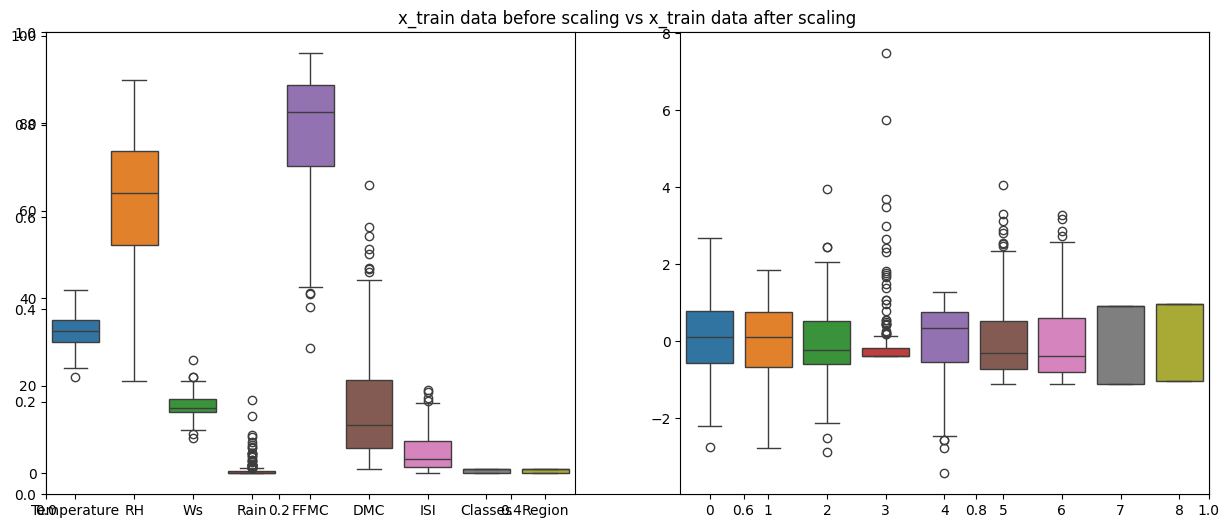

In [21]:
plt.figure(figsize=(15,6))
plt.title("x_train data before scaling vs x_train data after scaling")
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_standard)

the mean absolute error value is :  0.5505232102156125
the mean squared error is :  0.6727147452814868
the root squared mean error is :  0.8201918954010011
r2 score is :  0.9848010281451797
Adjusted R2 score is : 0.9870808739234027


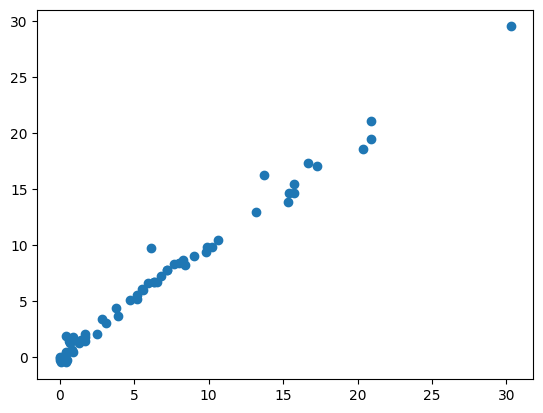

In [22]:
linear.fit(x_train_standard,y_train)
y_pred=linear.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))


the mean absolute error value is :  1.133175994914409
the mean squared error is :  2.2483458918974772
the root squared mean error is :  1.4994485292591664
r2 score is :  0.9492020263112388
Adjusted R2 score is : 0.956821722364553


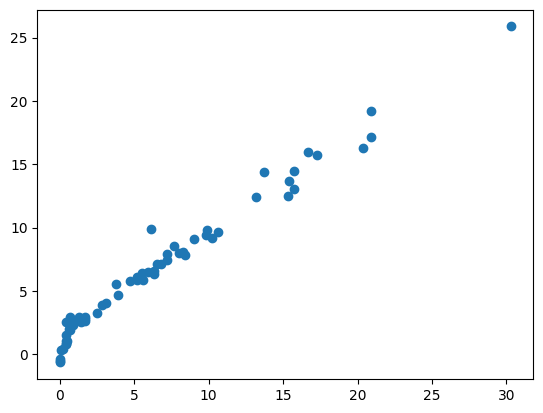

In [23]:
lasso.fit(x_train_standard,y_train)
y_pred=lasso.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.6211783846720837
the mean squared error is :  0.7912891030739593
the root squared mean error is :  0.8895443232767883
r2 score is :  0.9821220199334048
Adjusted R2 score is : 0.9848037169433941


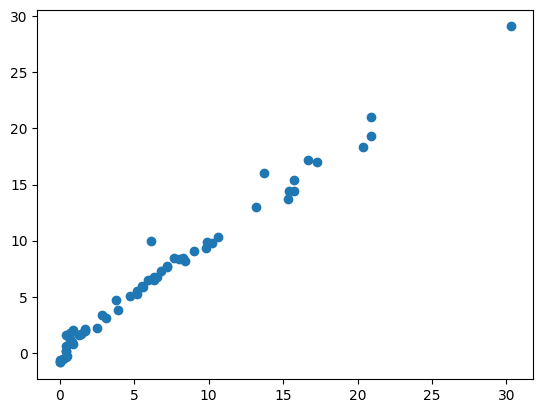

In [24]:
lasscv.fit(x_train_standard,y_train)
y_pred=lasscv.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.5664971806333838
the mean squared error is :  0.6931769957710776
the root squared mean error is :  0.8325725168242569
r2 score is :  0.9843387145546735
Adjusted R2 score is : 0.9866879073714725


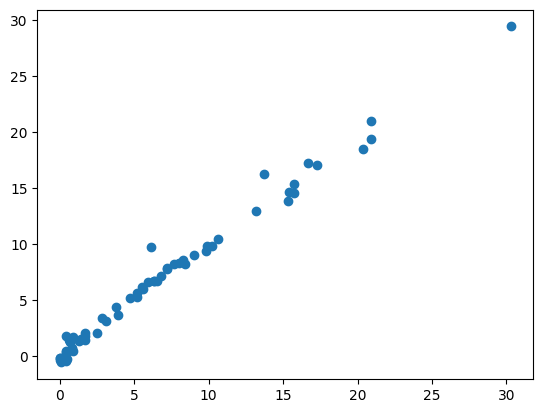

In [25]:
rid.fit(x_train_standard,y_train)
y_pred=rid.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.5664971806334391
the mean squared error is :  0.6931769957709737
the root squared mean error is :  0.8325725168241945
r2 score is :  0.9843387145546758
Adjusted R2 score is : 0.9866879073714745


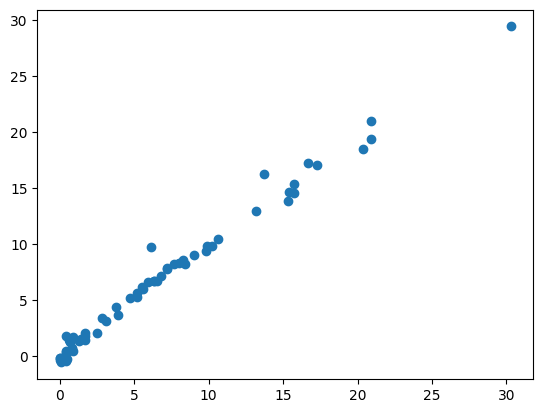

In [26]:
ridcv.fit(x_train_standard,y_train)
y_pred=ridcv.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  1.8822353634896
the mean squared error is :  5.517251101025224
the root squared mean error is :  2.3488829474933874
r2 score is :  0.8753460589519703
Adjusted R2 score is : 0.8940441501091747


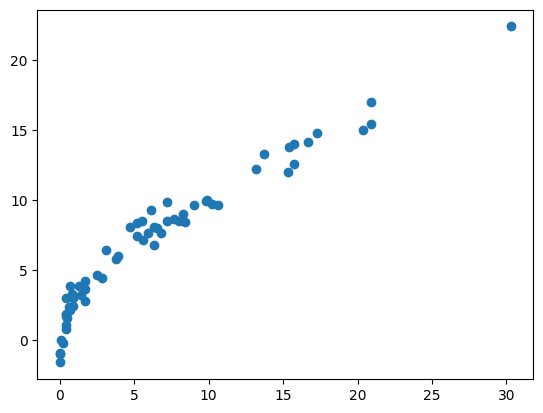

In [27]:
elastic.fit(x_train_standard,y_train)
y_pred=elastic.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

the mean absolute error value is :  0.6578570673495132
the mean squared error is :  0.8193589188514123
the root squared mean error is :  0.9051844667532758
r2 score is :  0.9814878249154362
Adjusted R2 score is : 0.9842646511781208


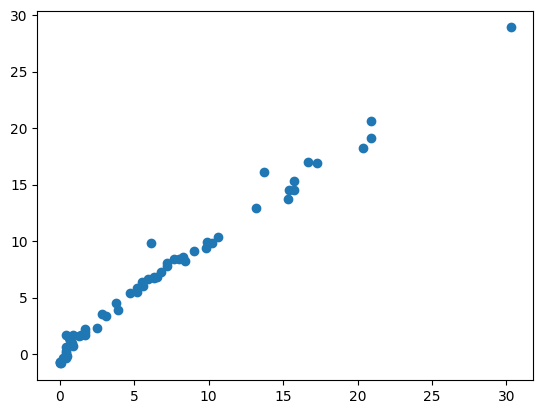

In [ ]:
elasticv.fit(x_train_standard,y_train)
y_pred=elasticv.predict(x_test_standard)
plt.scatter(y_test,y_pred)
print("the mean absolute error value is : ",mean_absolute_error(y_test,y_pred))
print("the mean squared error is : ",mean_squared_error(y_test,y_pred))
print("the root squared mean error is : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is : ",r2_score(y_test,y_pred))
print("Adjusted R2 score is :", 1 - (1 - r2_score(y_test, y_pred)) * ((len(y_test) - x_test.shape[1] - 1) / (len(y_test) - 1)))

In [29]:
import pickle

In [30]:
pickle.dump(linear,open('linear.pkl','wb'))
linear_model=pickle.load(open('linear.pkl','rb'))


In [31]:
pickle.dump(lasso,open('lasso.pkl','wb'))
lasso_model=pickle.load(open('lasso.pkl','rb'))

array([ 7.84570511,  7.4760351 ,  1.06280248,  5.57182566,  7.15885302,
        2.98472993,  3.29585571,  7.88757659,  2.64885633,  3.93029159,
        1.49954269,  9.90939713,  9.38584995, 15.7567602 , 16.31754696,
        2.94285845,  2.56817739, -0.40623463,  7.0973165 ,  4.05837568,
        2.78651163,  0.83183302,  6.46086185,  0.80409291, 19.21068568,
        5.76645732,  5.86530516,  9.16901185, -0.64326039,  9.83769504,
        6.56628861,  1.06684001,  9.62691324, 13.06176805,  2.57722597,
        2.28322385,  2.59487225,  6.44426082,  0.37191286,  0.3915779 ,
        6.32171041,  2.93276462,  8.11248975, -0.54845009, 14.49798226,
        7.96825553,  8.55326749,  2.03662688, 12.4409409 ,  1.88633635,
       25.87619242,  6.07660958, 15.93875663, 17.14160346, 12.52311598,
       14.3603987 ,  2.35836911,  9.12915914,  4.68421388, 13.65732474,
        5.85117379])